# G1 Introduction to Grover Search
In module A, we sped up the lock-breaking process by testing states in pairs. This told us when the solution was present, but not which state it was. Our goal now will be to try and figure out the state  directly, and our broad strategy will be to start in the uniform superposition and somehow "pump" amplitude from the other states into , so that we measure the solution  with high probability. This strategy is called amplitude amplification. Let's start by exploring what happens to amplitudes when we apply the oracle.

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

### Codercise G.1.1. 
Complete the following code for returning the amplitudes after applying the oracle to the uniform superposition. The oracle is accessible as oracle_matrix(combo), where combo is the secret combination. Amplitudes will be plotted for combo = [0, 0, 0, 1].

In [ ]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

@qml.qnode(dev)
def oracle_amp(combo):
    """Prepare the uniform superposition and apply the oracle.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns: 
        array[complex]: The quantum state (amplitudes) after applying the oracle.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for _ in range(n_bits):
	    qml.Hadamard(wires=_)
    qml.QubitUnitary(oracle_matrix(combo), wires=[_ for _ in range(n_bits)])

    return qml.state()


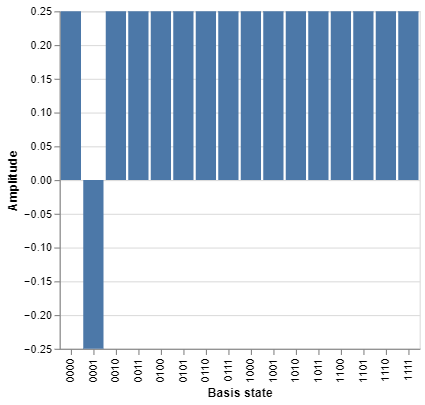

### Codercise G.1.2. 
(a) Define the diffusion operator as a matrix, and visualize its effect on the amplitudes in the post-oracle state. We'll plot the amplitudes for combo=[0, 0, 0, 0]. Note that oracle_matrix(combo) remains available.

In [ ]:
n_bits = 4

def diffusion_matrix():
    """Return the diffusion matrix.

    Returns: 
        array[float]: The matrix representation of the diffusion operator.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    I = np.eye(2**n_bits)
    phi = 1/np.sqrt(2**n_bits) * np.ones(shape=(2**n_bits))
    return 2*np.outer(phi,phi) - I
    #pass # FORM A DIFFERENCE OF MATRICES

@qml.qnode(dev)
def difforacle_amp(combo):
    """Apply the oracle and diffusion matrix to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle
        and diffusion.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
	    qml.Hadamard(wires=i)
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    qml.QubitUnitary(diffusion_matrix(),wires=[i for i in range(n_bits)])


    return qml.state()


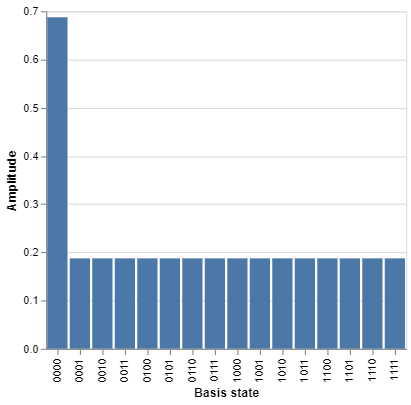

In [ ]:
@qml.qnode(dev)
def two_difforacle_amp(combo):
    """Apply the Grover operator twice to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns: 
        array[complex]: The resulting quantum state.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
	    qml.Hadamard(wires=i)
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    qml.QubitUnitary(diffusion_matrix(), wires=[i for i in range(n_bits)])
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    qml.QubitUnitary(diffusion_matrix(), wires=[i for i in range(n_bits)])

    return qml.state()
